In [5]:
import os
import matplotlib.pyplot as plt

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "v1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# 데이터 읽기
# 모든 데이터를 담은 pandas의 DataFrame 객체 반환

import pandas as pd

COMBINATION_PATH = os.path.join("datasets", "v1")

def load_combination_data(combination_path=COMBINATION_PATH):
     csv_path = os.path.join(combination_path, "ByAstar_20230627_093742_1.csv")
     return pd.read_csv(csv_path)

data_1 = load_combination_data()

In [3]:
data_1.head()

,Case,gate lenght,Theta,Phi,dt,combination,total time,computing time
0,case2,4,0.602840,4.944722,3,"[3, 2, 2, 4]",12,1.531173
1,case3,13,1.453271,3.579795,3,"[4, 1, 1, 3, 3, 2, 4, 4, 1, 1, 3, 3, 2]",39,19.615850
2,case4,8,0.930037,2.193507,3,"[3, 2, 2, 4, 4, 1, 3, 3]",24,7.804428
3,case5,10,0.953827,4.125024,3,"[3, 2, 2, 4, 4, 1, 3, 3, 2, 0]",30,17.435731
4,case6,28,2.944684,0.473979,3,"[1, 3, 3, 2, 2, 4, 1, 1, 3, 3, 2, 2, 4, 1, 1, ...",84,100.195590


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            782 non-null    object 
 1   gate lenght     782 non-null    int64  
 2   Theta           782 non-null    float64
 3   Phi             782 non-null    float64
 4   dt              782 non-null    int64  
 5   combination     782 non-null    object 
 6   total time      782 non-null    int64  
 7   computing time  782 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 49.0+ KB


그림 저장: attribute_histogram_plots


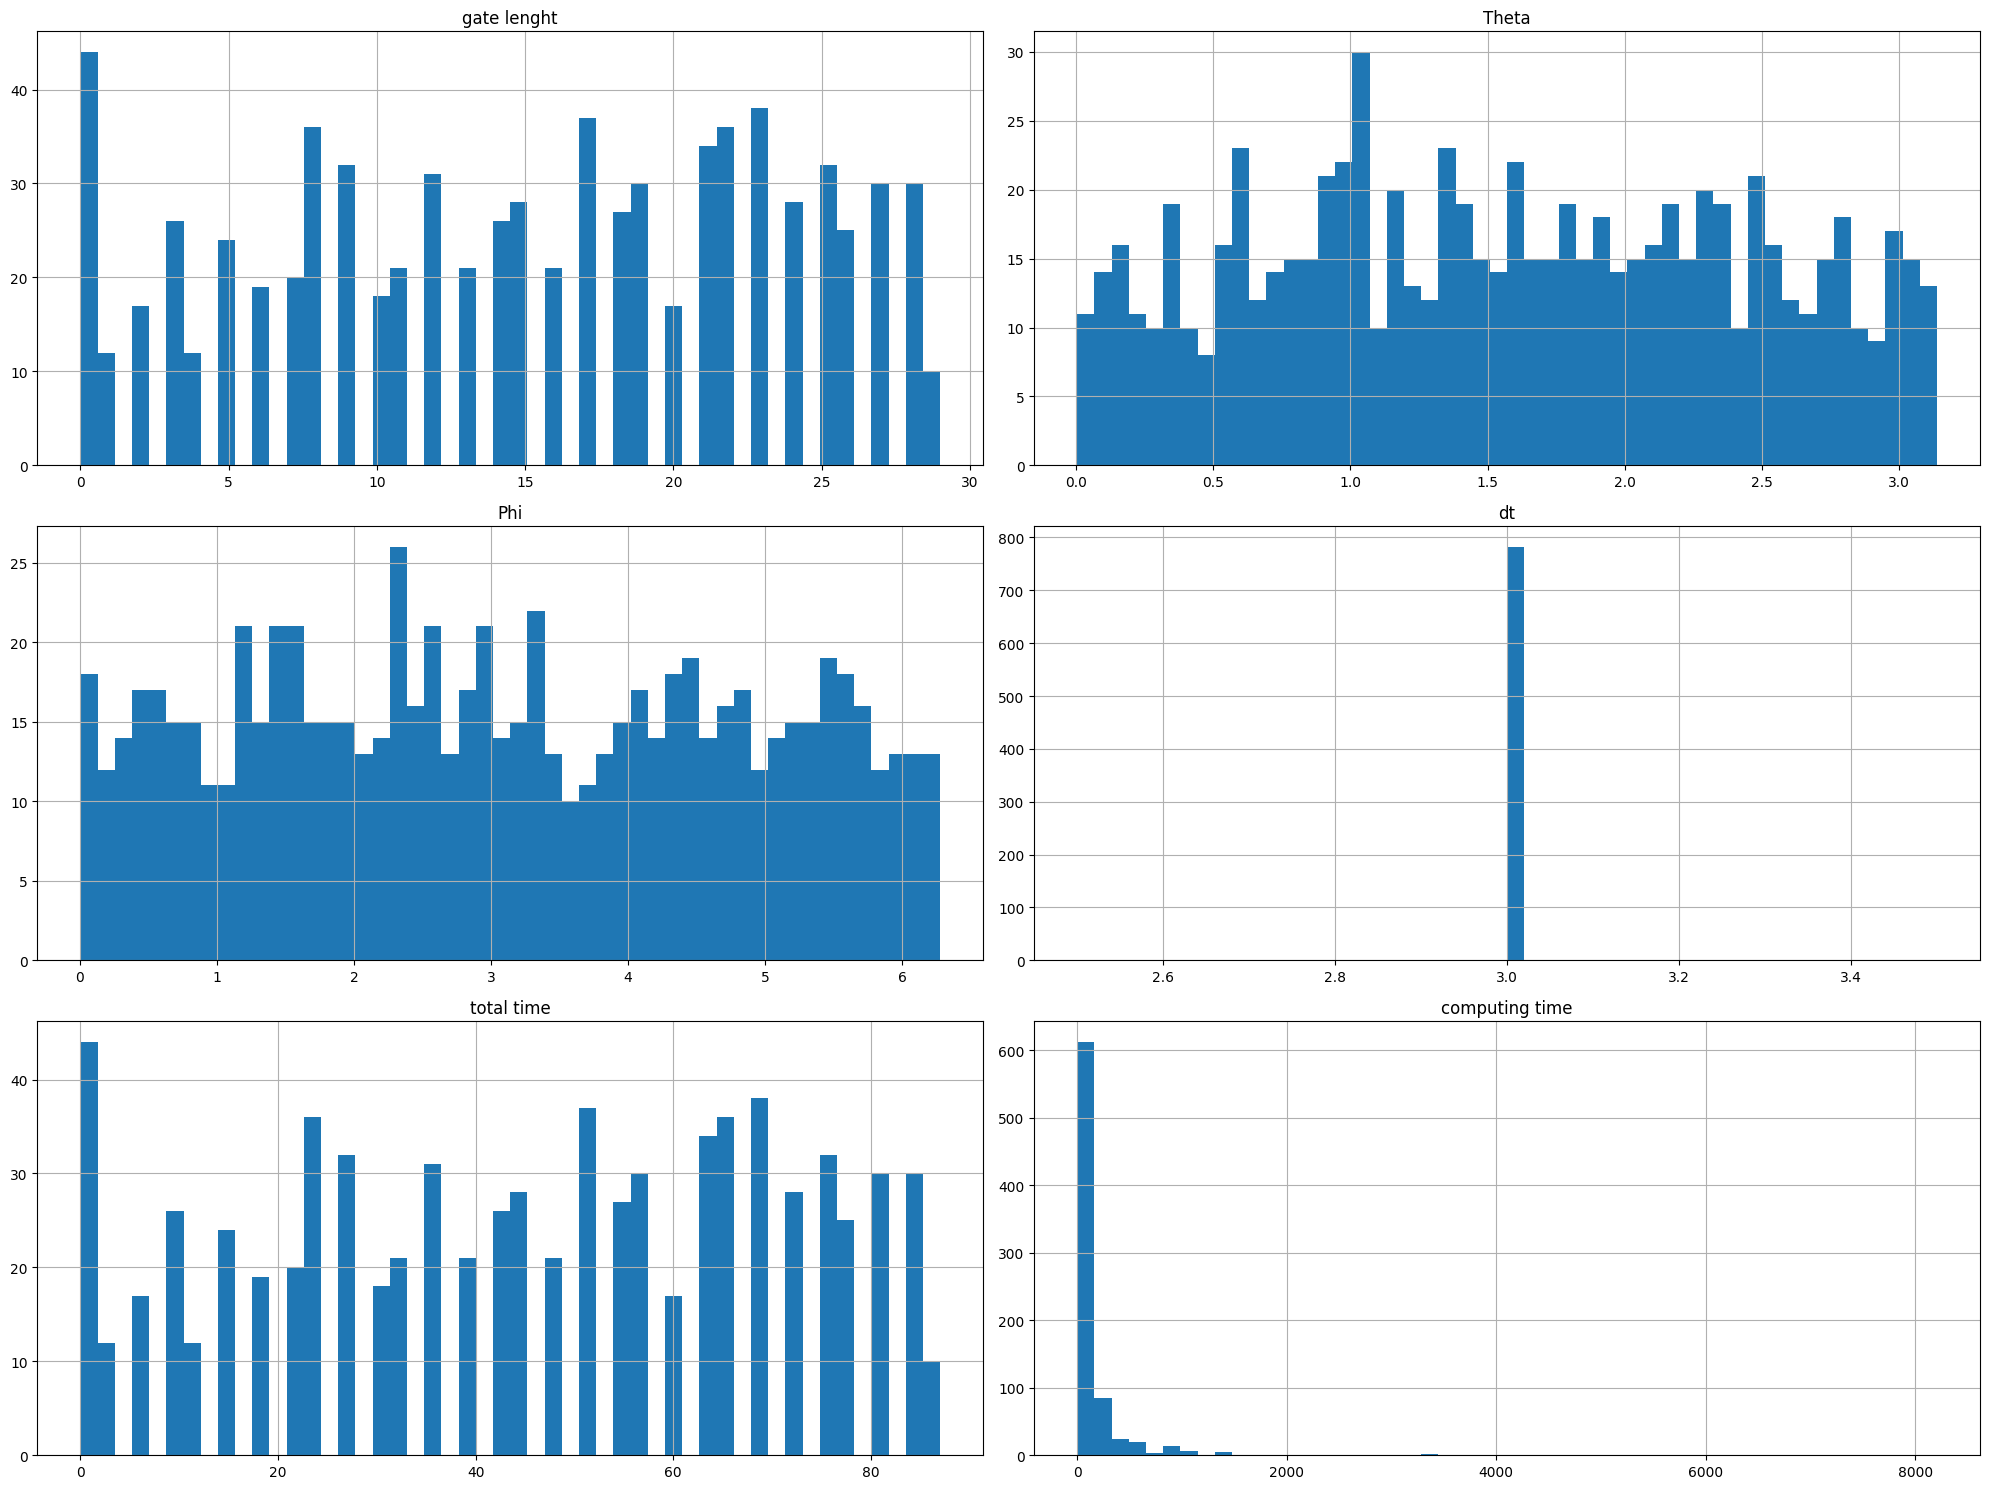

In [6]:
%matplotlib inline

data_1.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# 히스토그램(주어진 값 범위 수평축, 샘플 수 수직축)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터를 학습용과 테스트용으로 나누기
train_set, test_set = train_test_split(data_1, test_size=0.2, random_state=42)

test_set.head()

,Case,gate lenght,Theta,Phi,dt,combination,total time,computing time
596,case598,19,1.668998,1.124221,3,"[2, 4, 4, 1, 1, 3, 2, 2, 4, 4, 1, 1, 3, 2, 2, ...",57,1007.413370
588,case590,17,1.657594,2.596459,3,"[1, 3, 3, 2, 2, 4, 1, 1, 3, 3, 2, 2, 4, 1, 1, ...",51,153.917874
208,case210,11,0.944681,3.507593,3,"[1, 3, 3, 2, 2, 4, 1, 1, 3, 0, 4]",33,56.302495
291,case293,17,1.827145,2.429612,3,"[1, 3, 3, 2, 2, 4, 1, 1, 3, 3, 2, 2, 4, 1, 1, ...",51,37.664088
174,case176,0,0.008299,0.167904,3,[],0,0.003001


In [25]:
train_set_copy = train_set.copy()          # 훈련 세트 복사본

<Axes: xlabel='Theta', ylabel='Phi'>

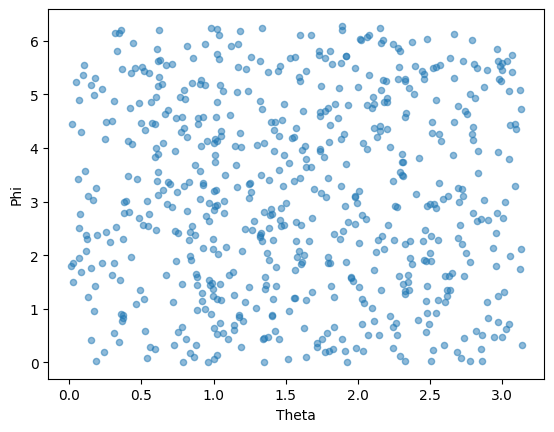

In [26]:
train_set_copy.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)     # 골고루 분포 확인

In [27]:
# # combination length = 0인 행 삭제
# data_non_0 = train_set_copy[train_set_copy['gate lenght'] != 0]
# data_non_0.head()

,Case,gate lenght,Theta,Phi,dt,combination,total time,computing time
602,case604,8,0.809702,0.434254,3,"[1, 3, 3, 2, 2, 4, 4, 1]",24,11.587209
133,case135,21,1.835949,0.655125,3,"[1, 3, 3, 2, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 3, ...",63,4145.317979
239,case241,27,2.802155,5.565412,3,"[1, 3, 3, 2, 2, 4, 1, 1, 3, 3, 2, 2, 4, 1, 1, ...",81,150.997914
55,case57,11,1.136937,1.689385,3,"[4, 1, 1, 3, 3, 2, 4, 4, 1, 1, 3]",33,22.341699
613,case615,23,2.475912,6.040825,3,"[4, 1, 1, 3, 3, 2, 4, 4, 1, 1, 3, 3, 2, 4, 4, ...",69,73.510248


In [30]:
data_non_combination = train_set_copy.drop("combination", axis=1)    # 훈련 세트를 위해 레이블 삭제
data_theta_phi = train_set_copy[["Theta", "Phi"]].copy()             # theta phi 열만
data_combination = train_set_copy["combination"].copy()              # 조합 열만

***

원핫인코딩 예시

In [34]:
# import pandas as pd
# import random

# # 예시 데이터 생성
# data = {'list_column': [random.sample(range(5), k=random.randint(1, 5)) for _ in range(10)]}
# df = pd.DataFrame(data)

# print(df)

       list_column
0              [3]
1     [3, 1, 4, 0]
2        [0, 4, 1]
3     [4, 0, 1, 2]
4  [0, 4, 1, 3, 2]
5     [3, 4, 1, 2]
6              [0]
7              [1]
8        [0, 1, 4]
9        [0, 1, 3]


In [36]:
# # 'list_column'을 one-hot 인코딩
# df_encoded = pd.get_dummies(df['list_column'].apply(pd.Series).stack()).groupby(level=0).sum()

# print(df_encoded)

   0.0  1.0  2.0  3.0  4.0
0    0    0    0    1    0
1    1    1    0    1    1
2    1    1    0    0    1
3    1    1    1    0    1
4    1    1    1    1    1
5    0    1    1    1    1
6    1    0    0    0    0
7    0    1    0    0    0
8    1    1    0    0    1
9    1    1    0    1    0


***

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import LSTM, Dense, Embedding

# # 가상의 데이터 생성
# theta = np.random.rand(1000, 1) * 2 * np.pi
# phi = np.random.rand(1000, 1) * 2 * np.pi
# sequence = [np.random.choice([0, 1, 2, 3, 4], size=np.random.randint(1, 10)) for _ in range(1000)]

# # 각 시퀀스를 원-핫 벡터로 변환
# sequence_encoded = [tf.keras.utils.to_categorical(seq, num_classes=5) for seq in sequence]

# # 모든 시퀀스의 길이를 동일하게 맞춤 (가장 긴 시퀀스의 길이로)
# sequence_encoded_padded = pad_sequences(sequence_encoded, padding='post')

# # 입력 데이터를 theta, phi, 패딩된 시퀀스로 구성
# X = np.hstack([theta, phi, sequence_encoded_padded])

# # 출력 데이터를 원래의 시퀀스로 설정
# y = sequence_encoded_padded

# # LSTM 모델 구성
# model = Sequential()
# model.add(Embedding(5, 32, input_length=len(X[0])))
# model.add(LSTM(32))
# model.add(Dense(5, activation='softmax'))

# # 모델 학습
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X, y, epochs=10, validation_split=0.2)

# # 새로운 theta와 phi 값에 대한 리스트 예측
# new_theta = np.array([[0.5]])
# new_phi = np.array([[0.5]])
# new_X = np.hstack([new_theta, new_phi, np.zeros((1, len(X[0])-2))])  # 초기 시퀀스는 0으로 설정
# predicted_sequence = model.predict(new_X)

In [45]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Concatenate, RepeatVector, TimeDistributed

# # 가상의 데이터 생성
# theta = np.random.rand(1000, 1) * 2 * np.pi
# phi = np.random.rand(1000, 1) * 2 * np.pi
# sequence = [np.random.choice([0, 1, 2, 3, 4], size=np.random.randint(1, 10)) for _ in range(1000)]

# # 모든 시퀀스의 길이를 동일하게 맞춤 (가장 긴 시퀀스의 길이로)
# sequence_padded = pad_sequences(sequence, padding='post')

# # 타겟 데이터를 생성 (원-핫 인코딩된 다음 숫자)
# sequence_targets = np.zeros((sequence_padded.shape[0], sequence_padded.shape[1], 5))  # 5는 클래스의 수입니다.
# for i in range(sequence_padded.shape[0]):
#     for j in range(sequence_padded.shape[1] - 1):
#         sequence_targets[i, j, sequence_padded[i, j+1]] = 1

# # 각각을 독립적인 입력으로 처리
# theta_input = Input(shape=(1,), name='theta_input')
# phi_input = Input(shape=(1,), name='phi_input')
# sequence_input = Input(shape=(sequence_padded.shape[1],), name='sequence_input')

# # theta와 phi를 시퀀스의 각 타임스텝에 반복
# theta_repeated = RepeatVector(sequence_padded.shape[1])(theta_input)
# phi_repeated = RepeatVector(sequence_padded.shape[1])(phi_input)

# # 임베딩 및 LSTM 레이어
# embedding_layer = Embedding(5, 32)(sequence_input)
# lstm_layer = LSTM(32, return_sequences=True)(embedding_layer)

# # 입력들을 합침
# concat_layer = Concatenate()([theta_repeated, phi_repeated, lstm_layer])

# # 출력 레이어
# output = TimeDistributed(Dense(5, activation='softmax'))(concat_layer)

# # 모델 정의
# model = Model(inputs=[theta_input, phi_input, sequence_input], outputs=output)

# # 모델 학습
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit({'theta_input': theta, 'phi_input': phi, 'sequence_input': sequence_padded}, sequence_targets, epochs=10, validation_split=0.2)

# # 새로운 theta와 phi 값에 대한 리스트 예측
# new_theta = np.array([[0.5]])
# new_phi = np.array([[0.5]])
# new_sequence = np.zeros((1, sequence_padded.shape[1]))  # 초기 시퀀스는 0으로 설정
# predicted_sequence = model.predict({'theta_input': new_theta, 'phi_input': new_phi, 'sequence_input': new_sequence})


Epoch 1/10
25/25 [==============================] - 2s 22ms/step - loss: 2.4902 - accuracy: 0.0949 - val_loss: 2.2276 - val_accuracy: 0.0894
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 1.6779 - accuracy: 0.3119 - val_loss: 1.1658 - val_accuracy: 0.5850
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 1.1553 - accuracy: 0.5992 - val_loss: 1.1034 - val_accuracy: 0.6117
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 1.0977 - accuracy: 0.6010 - val_loss: 1.0611 - val_accuracy: 0.6189
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 1.0631 - accuracy: 0.6103 - val_loss: 1.0267 - val_accuracy: 0.6289
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 1.0326 - accuracy: 0.6182 - val_loss: 0.9960 - val_accuracy: 0.6389
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 1.0061 - accuracy: 0.6204 - val_loss: 0.9698 - val_accuracy: 0.6439
Epoch 8/10
25/25 [=

In [46]:
# print(predicted_sequence)

[[[5.6910777e-01 7.4178517e-02 9.6042164e-02 1.1874276e-01 1.4192872e-01]
  [8.7812400e-01 1.4798374e-02 2.5050201e-02 3.5782877e-02 4.6244625e-02]
  [9.5987922e-01 4.3574544e-03 7.9571623e-03 1.1840470e-02 1.5965842e-02]
  [9.7932822e-01 2.2357539e-03 3.9435751e-03 6.0271253e-03 8.4653907e-03]
  [9.8620981e-01 1.5025997e-03 2.5268320e-03 3.9916136e-03 5.7691270e-03]
  [9.8942298e-01 1.1604142e-03 1.8778329e-03 3.0492258e-03 4.4894749e-03]
  [9.9116373e-01 9.7576866e-04 1.5339684e-03 2.5401437e-03 3.7863518e-03]
  [9.9220264e-01 8.6605310e-04 1.3325131e-03 2.2366284e-03 3.3620563e-03]
  [9.9286807e-01 7.9608144e-04 1.2054078e-03 2.0423774e-03 3.0880531e-03]]]


***

In [ ]:
# from sklearn.linear_model import LinearRegression

# # 회귀 모델을 생성하고 학습시킵니다.
# model = LinearRegression()
# model.fit(data_theta_phi, data_combination)       # 리스트 형태 불가 ... 순서 정보 손실

In [ ]:
# # 테스트 데이터를 사용해 예측을 수행합니다.
# y_pred = model.predict(X_test)

# # 예측 결과를 반올림하여 정수로 만듭니다. (출력이 0, 1, 2, 3, 4인 리스트로 만들기 위해)
# y_pred = np.round(y_pred).astype(int)

# # 모델의 성능을 평가합니다. 평가 지표로는 RMSE를 사용합니다.
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error: ", rmse)

***